In [9]:
from sklearn.mixture import GaussianMixture
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.mixture import GaussianMixture

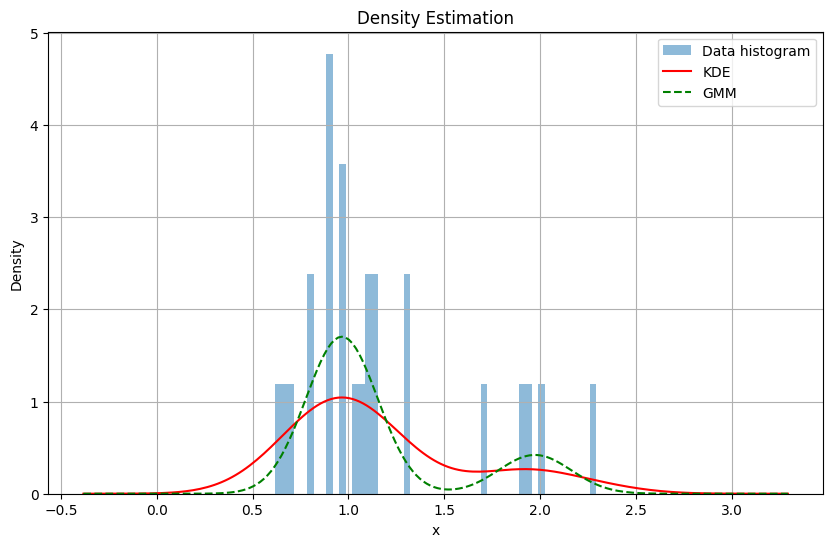

GMM means: [0.9657644  1.97289414]
GMM standard deviations: [0.18732162 0.18977859]
GMM weights: [0.79989272 0.20010728]


In [13]:

# Generate sample data (example: mixture of two Gaussians)
np.random.seed(42)
n1=20
n2=5
data = np.concatenate([
    np.random.normal(1, 0.2, n1),
    np.random.normal(2, 0.2, n2)
])

# Create a grid of points for plotting
x_grid = np.linspace(min(data)-1, max(data)+1, 200)

# 1. Kernel Density Estimation
kde = stats.gaussian_kde(data)
kde_density = kde(x_grid)

# 2. Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, random_state=42)
gmm.fit(data.reshape(-1, 1))
gmm_density = np.exp(gmm.score_samples(x_grid.reshape(-1, 1)))

# Plot everything
plt.figure(figsize=(10, 6))
plt.hist(data, bins=50, density=True, alpha=0.5, label='Data histogram')
plt.plot(x_grid, kde_density, 'r-', label='KDE')
plt.plot(x_grid, gmm_density, 'g--', label='GMM')
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Density Estimation')
plt.legend()
plt.grid(True)
plt.show()

# Print GMM parameters
print("GMM means:", gmm.means_.flatten())
print("GMM standard deviations:", np.sqrt(gmm.covariances_.flatten()))
print("GMM weights:", gmm.weights_)